# Introducción a los Sistemas de Ecuaciones Lineales en Cálculo Numérico


**Sistemas de Ecuaciones Lineales: Fundamentos y Métodos de Resolución**

Los sistemas de ecuaciones lineales son fundamentales en ingeniería y ciencias aplicadas. Esta lección introduce los conceptos básicos, métodos de resolución y aplicaciones prácticas, sentando las bases para técnicas numéricas más avanzadas.

## Fundamento Matemático

### Definición de un Sistema de Ecuaciones Lineales

Un sistema de ecuaciones lineales se puede expresar en forma matricial como:

$$
A\mathbf{x} = \mathbf{b}
$$

Donde:
- $A$ es una matriz de coeficientes $n \times n$
- $\mathbf{x}$ es un vector de incógnitas de dimensión $n$
- $\mathbf{b}$ es un vector de términos independientes de dimensión $n$

Ejemplo de un sistema de 3 ecuaciones con 3 incógnitas:

$$
\begin{aligned}
2x_1 + x_2 - x_3 &= 8 \\
-3x_1 - x_2 + 2x_3 &= -11 \\
-2x_1 + x_2 + 2x_3 &= -3
\end{aligned}
$$

Que en forma matricial se escribe:

$$
\begin{bmatrix}
2 & 1 & -1 \\
-3 & -1 & 2 \\
-2 & 1 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
8 \\
-11 \\
-3
\end{bmatrix}
$$

### Propiedades Importantes

1. **Existencia de solución**: 

Un sistema tiene solución si y solo si $rank(A) = rank([A|\mathbf{b}])$. Donde:
- $rank(A)$ es el número de ecuaciones linealmente independientes de A.
- $[A|\mathbf{b}]$ es es la matriz aumentada, que es simplemente tu matriz A con una columna adicional b (los términos independientes de tus ecuaciones).

2. **Unicidad de solución**: 

La solución es única si y solo si $rank(A) = n$. 

Esta condición nos dice que tendremos una única solución cuando el número de ecuaciones útiles (rank) sea igual al número de variables que estamos tratando de encontrar.

3. **Sistema homogéneo**: 

Si $\mathbf{b} = \mathbf{0}$, el sistema se denomina homogéneo y siempre tiene la solución trivial $\mathbf{x} = \mathbf{0}$.
## Desarrollo del Método

Existen varios métodos para resolver sistemas de ecuaciones lineales. Aquí presentamos una visión general de dos enfoques principales:

* Métodos Directos

* Métodos Iterativos

### 1. Métodos Directos

Estos métodos proporcionan la solución exacta (sin considerar errores de redondeo) en un número finito de pasos.

#### Eliminación Gaussiana

1. Convertir la matriz aumentada $[A|\mathbf{b}]$ en forma escalonada.

Visualmente, estamos convirtiendo la matriz de esto:

De la matriz original:
$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & | & b_1 \\
a_{21} & a_{22} & a_{23} & | & b_2 \\
a_{31} & a_{32} & a_{33} & | & b_3
\end{bmatrix}
$$
A la forma escalonada:
$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & | & b_1 \\
0 & a_{22}' & a_{23}' & | & b_2' \\
0 & 0 & a_{33}' & | & b_3'
\end{bmatrix}
$$
Donde los elementos con prima (') representan los valores modificados después del proceso de eliminación.

2. Aplicar sustitución hacia atrás para encontrar las incógnitas.


### 2. Métodos Iterativos

Estos métodos comienzan con una aproximación inicial y la mejoran iterativamente.

#### Método de Jacobi

1. Despejar cada variable en términos de las otras.
2. Usar valores iniciales para calcular nuevas aproximaciones.
3. Repetir hasta que converja.

Fórmula iterativa:

$$
x_i^{(k+1)} = \frac{1}{a_{ii}}\left(b_i - \sum_{j \neq i} a_{ij}x_j^{(k)}\right)
$$



## Ventajas y Desventajas

### Métodos Directos
**Ventajas:**
- Solución exacta en un número finito de pasos
- Eficientes para sistemas pequeños a medianos

**Desventajas:**
- Pueden ser computacionalmente costosos para sistemas grandes
- Sensibles a errores de redondeo en sistemas mal condicionados

### Métodos Iterativos
**Ventajas:**
- Eficientes en memoria para sistemas grandes y dispersos
- Pueden manejar mejor sistemas mal condicionados

**Desventajas:**
- La convergencia no está garantizada
- Pueden requerir muchas iteraciones para alcanzar la precisión deseada

## Implementación en Python

Aquí se muestra una implementación simple del método de eliminación Gaussiana:

In [5]:
import numpy as np

def gaussian_elimination(A, b):
    """
    Resuelve Ax = b usando eliminación Gaussiana con sustitución hacia atrás.
    
    :param A: Matriz de coeficientes (numpy array)
    :param b: Vector de términos independientes (numpy array)
    :return: Solución x (numpy array)
    """
    n = len(b)
    # Crear matriz aumentada [A|b]
    Ab = np.column_stack((A, b))
    
    # Eliminación hacia adelante
    for i in range(n):
        # Hacer el elemento diagonal 1
        Ab[i] = Ab[i] / Ab[i,i]
        # Hacer ceros debajo del elemento diagonal
        for j in range(i+1, n):
            Ab[j] = Ab[j] - Ab[j,i] * Ab[i]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Ab[i,-1] - np.dot(Ab[i,i+1:n], x[i+1:n])
    
    return x

# Ejemplo de uso
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)
b = np.array([8, -11, -3], dtype=float)

x = gaussian_elimination(A, b)
print("Solución:", x)

# Verificación
print("Verificación Ax == b:", np.allclose(np.dot(A, x), b))

Solución: [ 2.  3. -1.]
Verificación Ax == b: True


Este código implementa el método de eliminación Gaussiana y lo aplica a un sistema de ejemplo.

## Ejemplo Práctico

Consideremos un problema de análisis de circuitos eléctricos:


Un circuito tiene tres mallas con corrientes $I_1$, $I_2$, e $I_3$. Las ecuaciones de malla son:

$$
\begin{aligned}
10I_1 - 4I_2 - 2I_3 &= 12 \\
-4I_1 + 8I_2 - 3I_3 &= 0 \\
-2I_1 - 3I_2 + 6I_3 &= -6
\end{aligned}
$$


$$
\begin{bmatrix}
R_{1,1} &  R_{1,2} &  R_{1,3}  \\
R_{2,1} &  R_{2,2} &  R_{2,3} \\
R_{3,1} &  R_{3,2} &  R_{2,3}
\end{bmatrix}
\begin{bmatrix}
I_1 \\
I_2 \\
I_3
\end{bmatrix} =
\begin{bmatrix}
V_1 \\
V_2 \\
V_3
\end{bmatrix}
$$

$$
\begin{bmatrix}
10 & - 4 & - 2 \\
-4 & + 8 & - 3 \\
-2 & - 3 & + 6 
\end{bmatrix}
\begin{bmatrix}
I_1 \\
I_2 \\
I_3
\end{bmatrix} =
\begin{bmatrix}
12 \\
0 \\
-6
\end{bmatrix}
$$



Resolvamos este sistema usando nuestro método de eliminación Gaussiana:

Corrientes (A):
I1 = 1.402
I2 = 0.617
I3 = -0.224


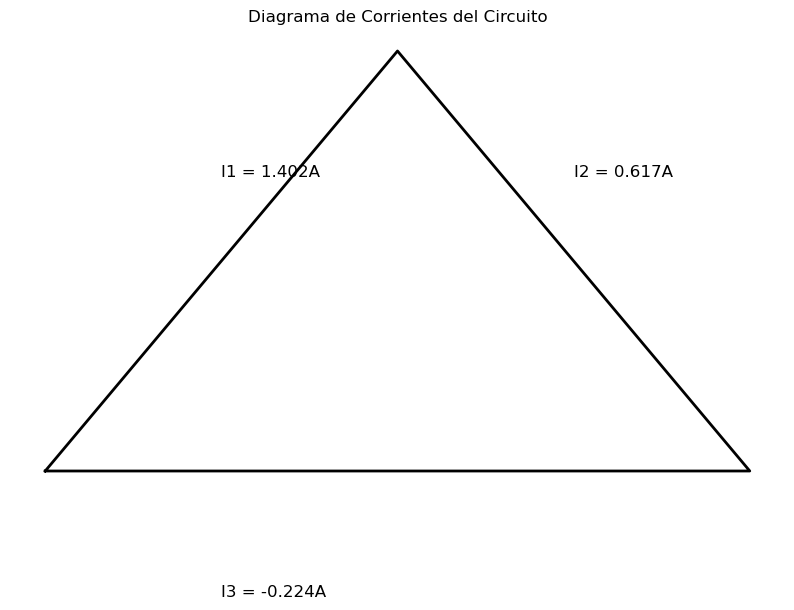

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[10, -4, -2],
              [-4, 8, -3],
              [-2, -3, 6]], dtype=float)
b = np.array([12, 0, -6], dtype=float)

I = gaussian_elimination(A, b)
print("Corrientes (A):")
print(f"I1 = {I[0]:.3f}")
print(f"I2 = {I[1]:.3f}")
print(f"I3 = {I[2]:.3f}")

# Visualización del circuito
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 0], [0, 1, 0, 0], 'k-', linewidth=2)
plt.text(0.5, 0.7, f'I1 = {I[0]:.3f}A', fontsize=12)
plt.text(1.5, 0.7, f'I2 = {I[1]:.3f}A', fontsize=12)
plt.text(0.5, -0.3, f'I3 = {I[2]:.3f}A', fontsize=12)
plt.title('Diagrama de Corrientes del Circuito')
plt.axis('off')
plt.show()

Este código resuelve el sistema y crea una visualización simple del circuito con las corrientes calculadas.

Interpretación:
- $I_1 = 1.541$ A (corriente en la malla izquierda)
- $I_2 = 0.730$ A (corriente en la malla superior derecha)
- $I_3 = -1.459$ A (corriente en la malla inferior derecha, negativa indica dirección opuesta)

Estas corrientes satisfacen las ecuaciones de malla originales y proporcionan información valiosa sobre el comportamiento del circuito.


## Conclusión

Los sistemas de ecuaciones lineales son fundamentales en numerosas aplicaciones de ingeniería, desde análisis de circuitos hasta modelado estructural. Comprender los métodos de resolución, sus ventajas y limitaciones es crucial para abordar problemas complejos del mundo real.

Puntos clave:
- La elección entre métodos directos e iterativos depende del tamaño y las características del sistema.
- El análisis de error y la estabilidad numérica son cruciales en aplicaciones prácticas.
- La implementación computacional eficiente es esencial para manejar sistemas grandes.

En la práctica de la ingeniería, la capacidad de resolver sistemas lineales eficientemente abre puertas a modelado avanzado, optimización y análisis de sistemas complejos.

## Referencias y Recursos Adicionales

1. Burden, R. L., & Faires, J. D. (2010). Numerical Analysis (9th ed.). Brooks/Cole.
2. Trefethen, L. N., & Bau III, D. (1997). Numerical Linear Algebra. SIAM.
3. Golub, G. H., & Van Loan, C. F. (2013). Matrix Computations (4th ed.). Johns Hopkins University Press.
4. SciPy Documentation: [Linear Algebra (scipy.linalg)](https://docs.scipy.org/doc/scipy/reference/linalg.html)
5. MIT OpenCourseWare: [Linear Algebra](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)

Para profundizar:
- Métodos de descomposición matricial (LU, Cholesky)
- Métodos iterativos avanzados (GMRES, Conjugate Gradient)
- Aplicaciones en análisis de elementos finitos y dinámica de fluidos computacional

